# Tasks to be done :
1. Data Exploration - treat missing values
2. Explore variables using Histogram
3. Create a count(frequency) plot describing the data types and the count of variables.

In [1]:
# import python libraries

import numpy as np 
import pandas as pd 

# visualizing data
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
print('All Library imported')

All Library imported


In [2]:
# import csv file
df = pd.read_csv('health care diabetes.csv')
print('data loaded')

data loaded


In [3]:
# top 5 rows
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# shape of data
df.shape

(768, 9)

In [5]:
#check for missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

We are lucky to have No missing values.!

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
# checking how many people have diabetes
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

268 people have diabetes and 500 do not have diabetes

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


## Univariate Analysis

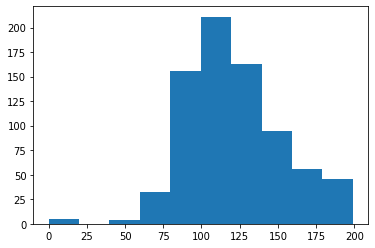

In [9]:
#create histogram for glucose using matplotlib
plt.hist(df['Glucose'])
plt.show()

Range is approx 50 to 200 ; Highest level of Glucose is 200.
somewhat looks like a normal distribution but not a pure normal distribution.

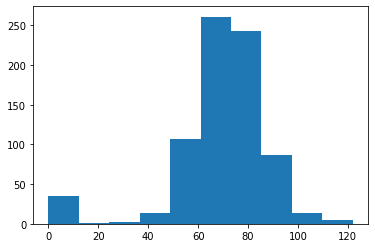

In [10]:
plt.hist(df['BloodPressure'])
plt.show()

lowest 40 to 100 ; Max at approx 70

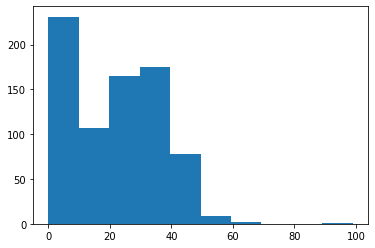

In [11]:
plt.hist(df['SkinThickness'])
plt.show()

Right Skewed Data - tail on right side ; Mean < Median


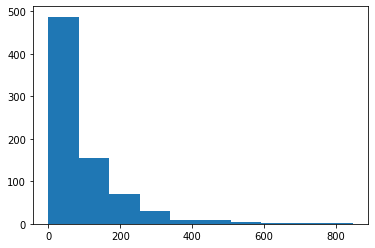

In [12]:
plt.hist(df['Insulin'])
plt.show()

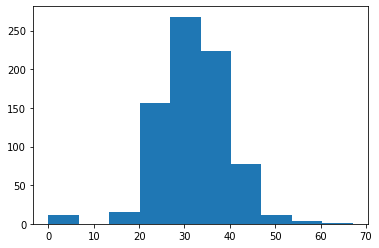

In [13]:
plt.hist(df['BMI'])
plt.show()

It's a normal distribution

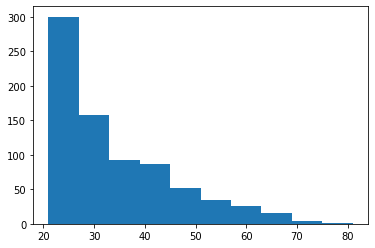

In [14]:
plt.hist(df['Age'])
plt.show()

Max users are of 20-25 age group

 Checking for Value 0 in the data and replacing it with None where 0 doesn't make sense
 if it is a normal distribution we can fill it with mean
 if it is not a normal distribution fill it with median

In [15]:
col = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for i in col:
    df[i].replace(0,df[i].median(), inplace=True)

In [16]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


### Data Exploration:

1. Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.

2. Create scatter charts between the pair of variables to understand the relationships. Describe your findings.

3. Perform correlation analysis. Visually explore it using a heat map.

In [17]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

<AxesSubplot: xlabel='Age', ylabel='count'>

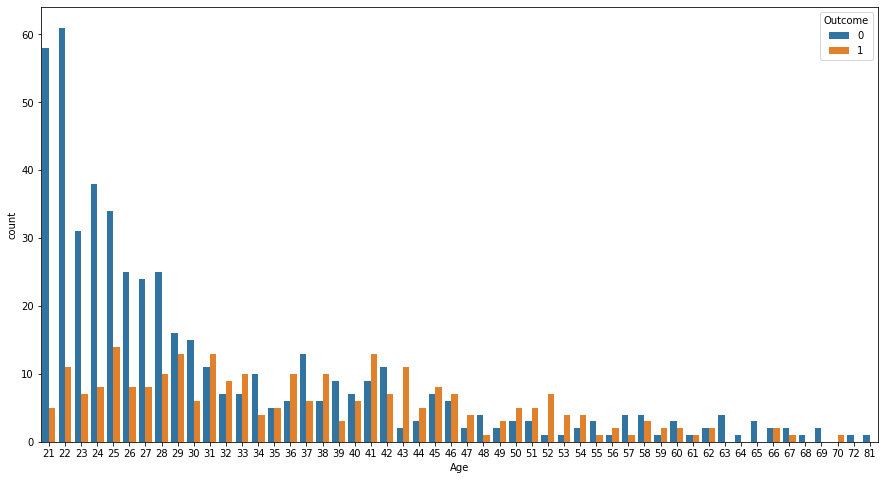

In [18]:
plt.figure(figsize = (15,8))
sns.countplot(x=df['Age'], hue='Outcome', data=df)

0 - not ahve diabetes
1 - have diabetes

In [19]:
### Getting the details of only the diabetic persons

dib_person = df[df['Outcome']==1]
dib_person

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
2,8,183,64,23,30.5,23.3,0.672,32,1
4,0,137,40,35,168.0,43.1,2.288,33,1
6,3,78,50,32,88.0,31.0,0.248,26,1
8,2,197,70,45,543.0,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
755,1,128,88,39,110.0,36.5,1.057,37,1
757,0,123,72,23,30.5,36.3,0.258,52,1
759,6,190,92,23,30.5,35.5,0.278,66,1
761,9,170,74,31,30.5,44.0,0.403,43,1


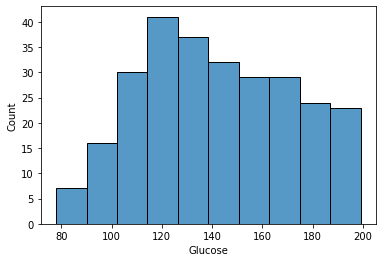

In [20]:
sns.histplot(x=dib_person['Glucose'])
plt.show()

In [21]:
dib_person['Glucose'].value_counts().head()

125    7
128    6
158    6
129    6
115    6
Name: Glucose, dtype: int64

7 people have Glucose of 125


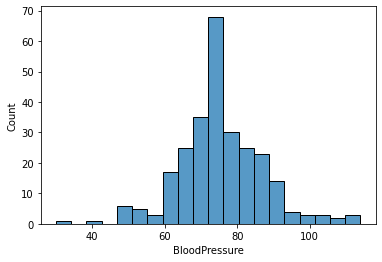

In [22]:
sns.histplot(x=dib_person['BloodPressure'])
plt.show()

In [23]:
dib_person['BloodPressure'].value_counts().head()

72    32
70    23
76    18
78    17
74    17
Name: BloodPressure, dtype: int64

32 people have BP of 72 and so on...

## Scatter Plot

Text(0, 0.5, 'Glucose')

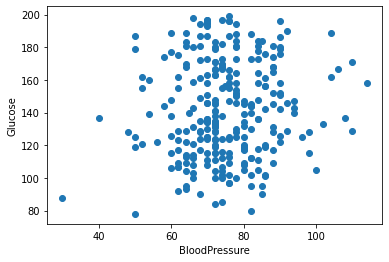

In [24]:
# Creating a scatter plot to see if glucose increases then blood pressure also increase? - Bivariate Analysis
# we are using the data of only diabetic persons

plt.scatter(x = dib_person['BloodPressure'], y=dib_person['Glucose'])
plt.xlabel('BloodPressure')
plt.ylabel('Glucose')

 Much relation not seen here

<AxesSubplot: xlabel='Glucose', ylabel='BloodPressure'>

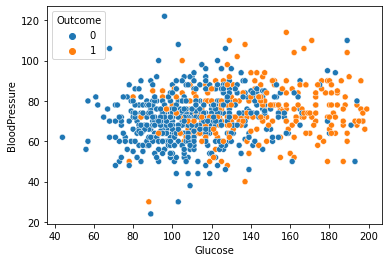

In [25]:
# Now let's work with the whole original dataset

sns.scatterplot(x='Glucose', y='BloodPressure', hue='Outcome', data=df)

In [26]:
# people having diabetes have higher glucose and BP in the same range 

<AxesSubplot: xlabel='SkinThickness', ylabel='Insulin'>

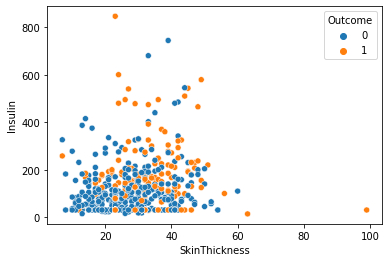

In [27]:
sns.scatterplot(x='SkinThickness', y='Insulin', hue='Outcome', data=df)

People having diabetes have higher Insulin wrt to SkinThickness

### Let's perform correlation analysis - Heatmap

correlation is calculated using Pearson correlation

In [28]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,0.032568,-0.055697,0.021546,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.172143,0.357573,0.231400,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.147809,-0.028721,0.281132,-0.002378,0.324915,0.165723
SkinThickness,0.032568,0.172143,0.147809,1.000000,0.238188,0.546951,0.142977,0.054514,0.189065
Insulin,-0.055697,0.357573,-0.028721,0.238188,1.000000,0.189022,0.178029,-0.015413,0.148457
BMI,0.021546,0.231400,0.281132,0.546951,0.189022,1.000000,0.153506,0.025744,0.312249
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.142977,0.178029,0.153506,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.054514,-0.015413,0.025744,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.189065,0.148457,0.312249,0.173844,0.238356,1.000000


we look at Outcome row here. It shows our target variable Outcome has Highest correlation with Glucose. and none of the variables have negative corr with outcome variable

<AxesSubplot: >

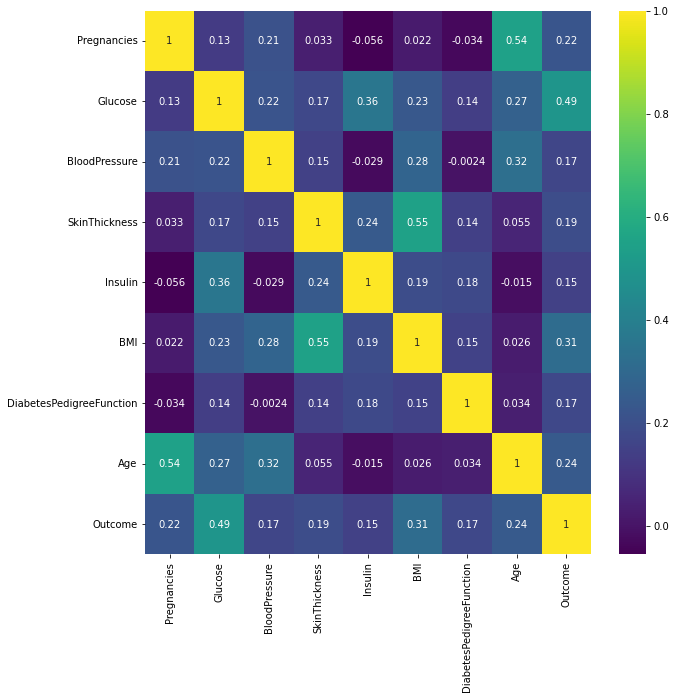

In [29]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='viridis')

## Data Modeling:

Devise strategies for model building. It is important to decide the right validation framework. Express your thought process. 

Apply an appropriate classification algorithm to build a model.

Compare various models with the results from KNN algorithm.

Create a classification report by analyzing sensitivity, specificity, AUC (ROC curve), etc.

Please be descriptive to explain what values of these parameter you have used.

In [30]:
# Data Preprocessing
# (creating DV, IDV, training data, test data)
# Let's extract features(X) vs label

X=df.iloc[:, :-1].values
# .values converts data into array


In [31]:
# input data we have
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [32]:
# label Y
y = df.iloc[:,-1].values
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

Applying ML Model one by one now

# CLASSIFICATION MODELS APPLICATION

In [33]:
# Step 1 : split the data into train and test data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=10)

In [34]:
X_train.shape

(614, 8)

In [35]:
X_test.shape

(154, 8)

In [36]:
import warnings
warnings.filterwarnings('ignore')

## 1. Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression #Class

model1 = LogisticRegression() #Object

In [38]:
#Training the model
model1.fit(X_train, y_train)

LogisticRegression()

In [39]:
y_pred1 = model1.predict(X_test)

In [40]:
# train score & test score ; checking both scores to see if any overfitting is there or not

print('Train score', model1.score(X_train, y_train))
print('Test score', model1.score(X_test, y_test))

Train score 0.7801302931596091
Test score 0.7272727272727273


Both accuracies are not very high.  We have overfitting.

In [41]:
from sklearn.metrics import confusion_matrix, classification_report

In [42]:
print(confusion_matrix(y_test, y_pred1))

[[83 12]
 [30 29]]


   0  1
0  TN FP
1  FN TP

Accuracy = (TP+TN)/ ALL = 83+29/30+12+83+29 = 112/154 = 72.7%

Recall = TP/TP+FN = 29/29+30 = 49%

Out of all positive classes, how many are correctly classified as positive is called RECALL. If recall score of target class is poor then it is not a good model. you need to improve it.

In [43]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.73      0.87      0.80        95
           1       0.71      0.49      0.58        59

    accuracy                           0.73       154
   macro avg       0.72      0.68      0.69       154
weighted avg       0.72      0.73      0.71       154



In [44]:
# 73% accuracy on test data

In [45]:
# Prepare ROC Curve

from sklearn.metrics import roc_auc_score, roc_curve
# roc_curve is created by calculating the probabilities.

prob = model1.predict_proba(X)
prob
# it returns the estimate of probability label for all classes.

# prob of 0 class,   1 class down below

array([[0.23785043, 0.76214957],
       [0.9374594 , 0.0625406 ],
       [0.15485464, 0.84514536],
       ...,
       [0.83610184, 0.16389816],
       [0.67902335, 0.32097665],
       [0.92269141, 0.07730859]])

In [46]:
# i would like to keep the prob of positive class only i.e. 1

# select prob for the positive outcome only

prob = prob[:,1]

# Calculate

auc = roc_auc_score(y,prob)
print('AUC score : %.3f ',auc)

AUC score : %.3f  0.8383805970149254


In [47]:
# is it a good Area under the curve AUC score?
# YES -> the model is doing right, but it can be better

# Calculate roc curve - it is created between FPR vs TPR (false +ve rate, true +ve rate)
# roc is created between y actual data, your probabilities

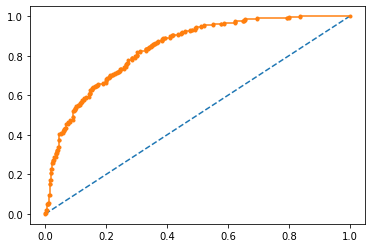

In [48]:
# Calculate roc curve

fpr, tpr, thresholds = roc_curve(y,prob)

# To see how much it is above the line.
# plot
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker='.')

In [49]:
# To save this model for future predictions
# joblib, pickle

import joblib

joblib.dump(model1,'log_reg.pkl')

print('model saved') # saved in the current working directory as a non readable binary file. you cant open it



model saved


In [50]:
# load the model back

Pred_model=joblib.load('log_reg.pkl')

print('model loaded')

model loaded


In [51]:
# Can the prediction be done on Real time data?
# Let's try

df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [52]:
Pregnancies=2
Glucose =148
BloodPressure = 72
SkinThickness = 40
Insulin = 100
BMI = 25.5
DiabetesPedigreeFunction = 0.35
Age = 35
output = Pred_model.predict([[Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age]])
print('Person has', output)

Person has [0]


In [53]:
# person is not diabetic

This model will work in any workbook

In [ ]:
2. Decision Tree

In [ ]:
3. Random Forest

In [ ]:
4. KNN

In [ ]:
5. SVM

In [54]:
# also compare the curve for every algorithm

Then create dashboard on tableau